## Bibliotecas Utilizadas

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
from datetime import datetime, time

Using TensorFlow backend.


In [2]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-23 00:16:11


# Funções

In [3]:
def get_dados(path, df):
    X = []
    Y = []
    for index, row in df.iterrows():
            arquivo = '{0}/{1}'.format(path, row["X_ray_image_name"])
            Xray = img_to_array(load_img(arquivo, target_size=(28, 28)))
            X.append(Xray)
            Y.append(row["Label"])
    return (X, Y)

In [4]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [27]:
def CNN_LeNet5(num_categorias,size,camadas):
    # Cria o modelo
    model = Sequential()
    #Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
    model.add(Conv2D(6, (4, 4), input_shape=(size, size, camadas), activation='relu'))#
    print( model.output_shape)
    #Camada de Pooling 	    
    model.add(AveragePooling2D(pool_size=(2, 2)))
    print( model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(12, (4, 4), activation='relu'))#
    print( model.output_shape)
    #Camada de Pooling 	    
    model.add(AveragePooling2D(pool_size=(2, 2)))
    print( model.output_shape)
    
    model.add(Dropout(0.2))

    #Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
    model.add(Flatten())
    print(model.output_shape)
    model.add(Dense(256, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))    
    model.add(Dense(128, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    #Função de Ativação Softmax
    model.add(Dense(num_categorias, activation='softmax'))
    print(model.output_shape)
    return model

# Rodando Algoritmos

In [6]:
path_treino = './X-Rays/train' 
path_teste = './X-Rays/test'

In [7]:
XRay = pd.read_csv('./X-Rays/Chest_xray_Corona_Metadata.csv')
XRay.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [8]:
XRayTreino = XRay[XRay["Dataset_type"]=='TRAIN']
XRayTest = XRay[XRay["Dataset_type"]=='TEST']

In [9]:
XRay.size

35460

In [10]:
XRayTreino.size

31716

In [11]:
XRayTest.size

3744

In [12]:
XRayTreino.size + XRayTest.size

35460

In [13]:
X_Ray, Result = get_dados(path_treino, XRayTreino)
X_train = np.asarray(X_Ray).astype(np.float32)
Y_train = np.asarray(Result)
X_train = X_train.astype('float32')/255
num_categorias = len(list(set(Y_train)))
print(num_categorias)
Y_train = np.array(Y_train)
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_train = to_categorical(Y_train, num_categorias)

X_train, x_val, Y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

2


(None, 25, 25, 6)
(None, 12, 12, 6)
(None, 9, 9, 12)
(None, 4, 4, 12)
(None, 192)
(None, 256)
(None, 128)
(None, 64)
(None, 2)
Train on 4228 samples, validate on 1058 samples
Epoch 1/300
4228/4228 [==============================] - 1s 331us/step - loss: 0.4650 - accuracy: 0.7912 - val_loss: 0.2818 - val_accuracy: 0.8998
Epoch 2/300
4228/4228 [==============================] - 1s 215us/step - loss: 0.2680 - accuracy: 0.8874 - val_loss: 0.1834 - val_accuracy: 0.9310
Epoch 3/300
4228/4228 [==============================] - 1s 213us/step - loss: 0.2204 - accuracy: 0.9089 - val_loss: 0.1712 - val_accuracy: 0.9329
Epoch 4/300
4228/4228 [==============================] - 1s 210us/step - loss: 0.2049 - accuracy: 0.9170 - val_loss: 0.1370 - val_accuracy: 0.9376
Epoch 5/300
4228/4228 [==============================] - 1s 207us/step - loss: 0.1803 - accuracy: 0.9276 - val_loss: 0.1371 - val_accuracy: 0.9357
Epoch 6/300
4228/4228 [==============================] - 1s 217us/step - loss: 0.1559 - ac

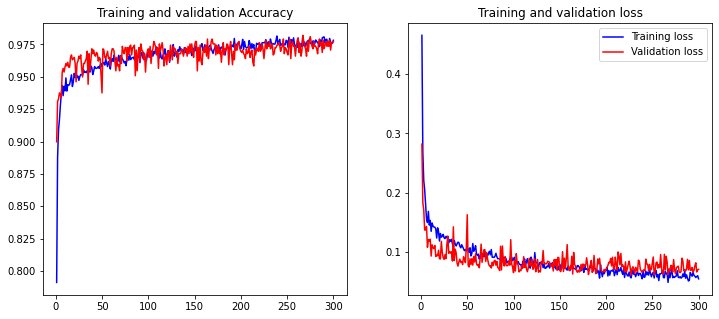

In [28]:
model = CNN_LeNet5(num_categorias,28,3)
#plot_model(model, show_shapes=True, show_layer_names=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath='./modelo_cnn_LeNet_8_3.hdf5', verbose=0,  save_best_only=True, monitor='val_accuracy')
history = model.fit(X_train, Y_train, validation_data = (x_val, y_val), epochs=300, batch_size=30, callbacks=[checkpoint])
plot_history(history)
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))

# Teste

In [25]:
X_Ray, Result = get_dados(path_teste, XRayTest)
X_test = np.asarray(X_Ray).astype(np.float32)
Y_test = np.asarray(Result)
X_test = X_test.astype('float32')/255
num_categorias = len(list(set(Y_test)))
print(num_categorias)
Y_test = np.array(Y_test)
label_encoder = LabelEncoder()
Y_test = label_encoder.fit_transform(Y_test)
Y_test = to_categorical(Y_test, num_categorias)
#model = load_model('./modelo_cnn_Le8.hdf5')
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

2
Erro da CNN: 27.24%
Acurária da CNN: 72.76%


In [ ]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))